<a href="https://colab.research.google.com/github/abhishek9686/Tensorflow/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 119kB/s 
     |████████████████████████████████| 450kB 60.5MB/s 
     |████████████████████████████████| 3.8MB 46.9MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import tensorflow as tf


In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline

In [0]:
class_names=['airplane','automoblie','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
X_train=X_train/255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test=X_test/255.0

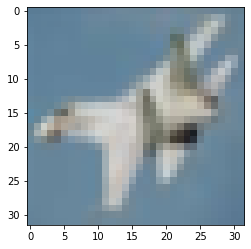

In [10]:
plt.imshow(X_test[10])

In [0]:
model=tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[32,32,3]))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [0]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["sparse_categorical_accuracy"])

In [25]:
model.fit(X_train,y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 243s 5ms/sample - loss: 1.3243 - sparse_categorical_accuracy: 0.5226
Epoch 2/10
50000/50000 [==============================] - 227s 5ms/sample - loss: 0.8870 - sparse_categorical_accuracy: 0.6878
Epoch 3/10
50000/50000 [==============================] - 223s 4ms/sample - loss: 0.7121 - sparse_categorical_accuracy: 0.7504
Epoch 4/10
50000/50000 [==============================] - 223s 4ms/sample - loss: 0.5833 - sparse_categorical_accuracy: 0.7947
Epoch 5/10
50000/50000 [==============================] - 222s 4ms/sample - loss: 0.4696 - sparse_categorical_accuracy: 0.8342
Epoch 6/10
50000/50000 [==============================] - 222s 4ms/sample - loss: 0.3683 - sparse_categorical_accuracy: 0.8706
Epoch 7/10
50000/50000 [==============================] - 222s 4ms/sample - loss: 0.2884 - sparse_categorical_accuracy: 0.8967
Epoch 8/10
50000/50000 [==============================] - 221s 4ms/sample - loss: 0.2233

In [28]:
test_loss,test_accu=model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [30]:
print("test Accuracy:{}".format(test_accu))

test Accuracy:0.7384999990463257


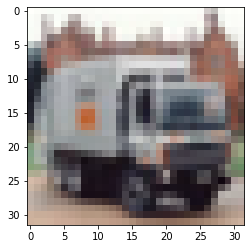

In [31]:
plt.imshow(X_test[11])

In [32]:
y_test[11]

array([9], dtype=uint8)

In [33]:
print(y_test[11])

[9]
